In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_columns', 100)

In [2]:
#receiving_df = pd.read_csv('receiving_df.csv', index_col = 0)

In [3]:
#rushing_df = pd.read_csv('rushing_df.csv', index_col = 0)

In [4]:
#passing_df = pd.read_csv('passing_df.csv', index_col = 0)

In [5]:
#passing_drops = ['draft', 'cmp', 'inc', 'pick6', 'int%', 'sk%', 'any/a', 'rate', 'rk']

In [6]:
#passing_df = passing_df.drop(columns = passing_drops)

In [7]:
#passing_df = passing_df.replace(to_replace = ['@'], value = 'away')

In [8]:
#passing_df.rename(columns = {"unnamed: 10": "home/away"}, 
#inplace = True)

In [9]:
#passing_df['home/away'] = passing_df['home/away'].fillna('home')

In [10]:
#passing_df['age'] = passing_df['age'].str[:2]


In [11]:
#passing_df.fillna(0)

In [12]:
#passing_df.to_csv('clean_passing_df.csv')

In [13]:
#receiving_df = receiving_df.drop(columns = ['rk', '1d', 'draft'])

In [14]:
#receiving_df = receiving_df.replace(to_replace = ['@'], value = 'away')

In [15]:
#receiving_df.rename(columns = {"unnamed: 10": "home/away"}, 
#          inplace = True)

In [16]:
#receiving_df['home/away'] = receiving_df['home/away'].fillna('home')

In [17]:
#receiving_df['age'] = receiving_df['age'].str[:2]

In [18]:
#receiving_df.to_csv('clean_receiving_df.csv')

In [19]:
#rushing_df = rushing_df.drop(columns = ['rk', '1d', 'draft'])

In [20]:
#rushing_df['age'] = rushing_df['age'].str[:2]

In [21]:
#rushing_df = rushing_df.replace(to_replace = ['@'], value = 'away')

In [22]:
#rushing_df.rename(columns = {"unnamed: 10": "home/away"}, 
#          inplace = True)

In [23]:
#rushing_df['home/away'] = rushing_df['home/away'].fillna('home')

In [24]:
#rushing_df.to_csv('clean_rushing_df.csv')

In [25]:
rushing_df = pd.read_csv('clean_rushing_df.csv', index_col = 0)

In [26]:
rushing_df['date'] = pd.to_datetime(rushing_df['date'])

In [27]:
rushing_df

,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,pts,avg_pts,pts_var
0,Saquon Barkley,164,18,Sun,1,1,2022-09-11,25,NYG,away,TEN,W 21-20,9.1,1,RB,22.4,12.225000,10.175000
1,Jonathan Taylor,161,31,Sun,1,1,2022-09-11,23,IND,away,HOU,T 20-20 (OT),5.2,1,RB,22.1,11.536364,10.563636
2,D'Andre Swift,144,15,Sun,1,1,2022-09-11,23,DET,home,PHI,L 35-38,9.6,1,RB,20.4,5.469231,14.930769
3,Nick Chubb,141,22,Sun,1,1,2022-09-11,26,CLE,away,CAR,W 26-24,6.4,0,RB,14.1,13.262500,0.837500
4,Leonard Fournette,127,21,Sun,1,1,2022-09-11,27,TAM,away,DAL,W 19-3,6.0,0,RB,12.7,5.857143,6.842857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Theo Riddick,-2,3,Sun,15,16,2018-12-23,27,DET,home,MIN,L 9-27,-0.7,0,RB,-0.2,1.633333,-1.833333
1961,Derek Carr,-3,4,Mon,15,16,2018-12-24,27,OAK,home,DEN,W 27-14,-0.8,0,QB,-0.3,0.972727,-1.272727
1962,Sterling Shepard,-3,1,Sun,15,16,2018-12-23,25,NYG,away,IND,L 27-28,-3.0,0,WR,-0.3,1.200000,-1.500000
1963,Tim Patrick,-7,1,Mon,15,16,2018-12-24,25,DEN,away,OAK,L 14-27,-7.0,0,WR,-0.7,0.566667,-1.266667


In [28]:
passing_df = pd.read_csv('clean_passing_df.csv')

In [29]:
receiving_df = pd.read_csv('clean_receiving_df.csv')

In [30]:
receiving_df['date'] = pd.to_datetime(receiving_df['date'])

In [31]:
passing_df['date'] = pd.to_datetime(passing_df['date'])

In [32]:
def weekly_breakdown(df, season):
    weekly_dfs = []
    n = 1
    df = df[df['date'].dt.year==season]
    while n < 17:
        week_number = df[df['week'] == n]
        week_number = week_number.sort_values('pts', ascending = False).head(50)
        weekly_dfs.append(week_number)
        n = n + 1
        
    new_df = pd.concat(weekly_dfs)
    return new_df

<AxesSubplot:xlabel='week', ylabel='pts'>

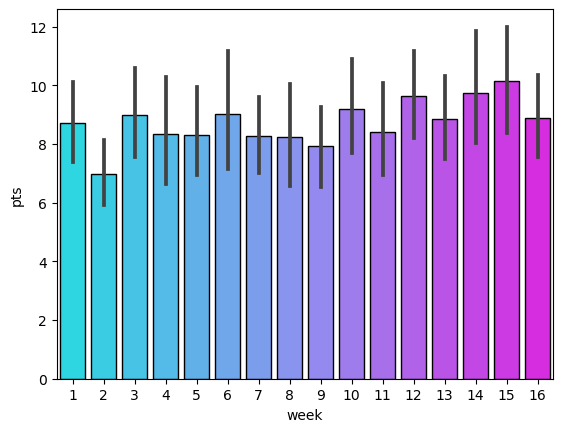

In [33]:
rush_df18 = weekly_breakdown(rushing_df,2018)

sns.barplot(y = rush_df18.pts, x = rush_df18.week, data = rush_df18, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

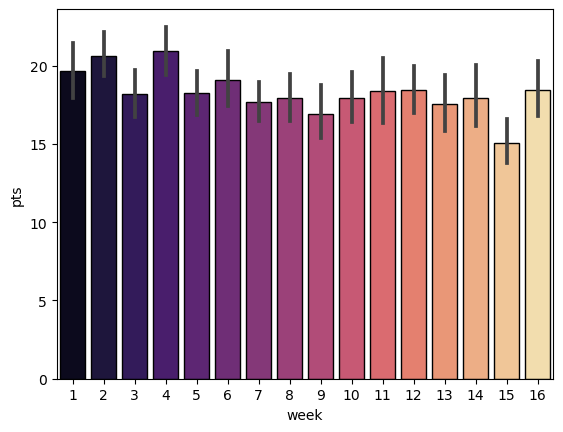

In [34]:
rec_df18 = weekly_breakdown(receiving_df, 2018)

sns.barplot(y = rec_df18.pts, x = rec_df18.week, data = rec_df18, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

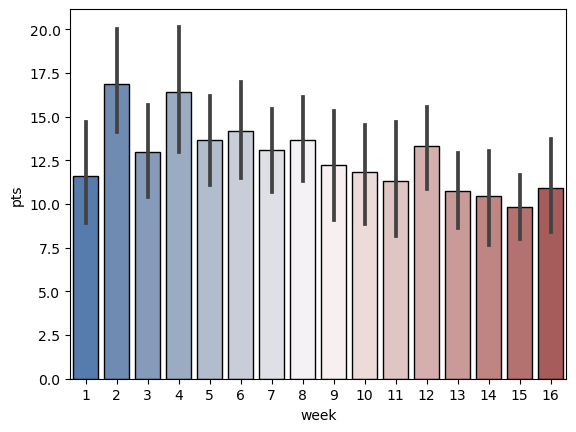

In [35]:
pa_df18 = weekly_breakdown(passing_df, 2018)

sns.barplot(y = pa_df18.pts, x = pa_df18.week, data = pa_df18, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

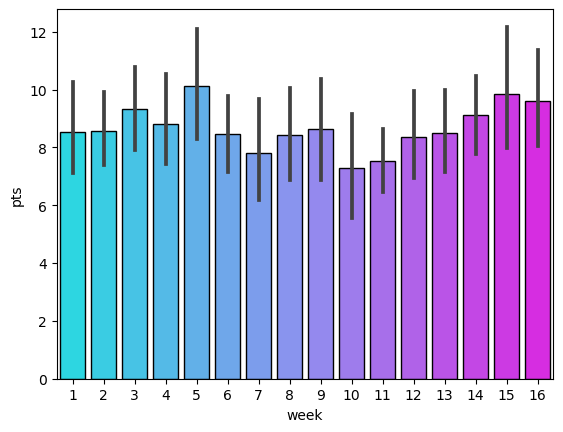

In [36]:
rush_df19 = weekly_breakdown(rushing_df,2019)

sns.barplot(y = rush_df19.pts, x = rush_df19.week, data = rush_df19, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

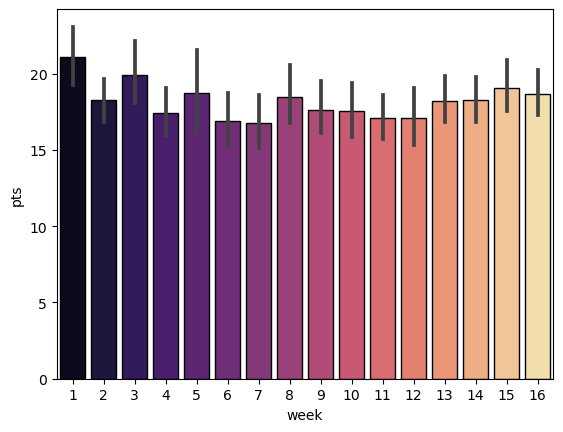

In [37]:
rec_df19 = weekly_breakdown(receiving_df, 2019)

sns.barplot(y = rec_df19.pts, x = rec_df19.week, data = rec_df19, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

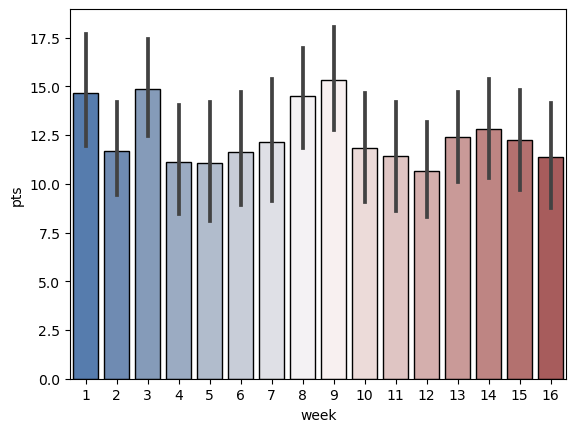

In [38]:
pa_df19 = weekly_breakdown(passing_df, 2019)

sns.barplot(y = pa_df19.pts, x = pa_df19.week, data = pa_df19, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

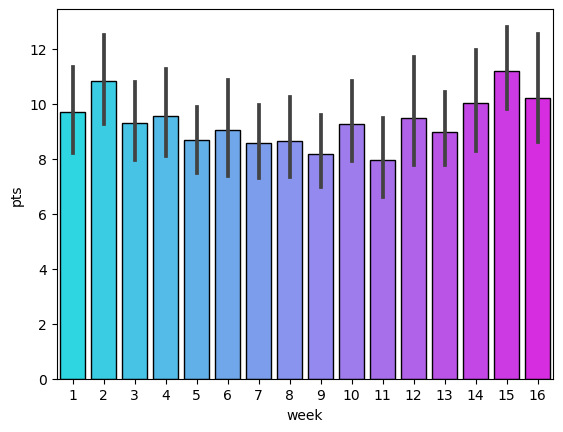

In [39]:
rush_df20 = weekly_breakdown(rushing_df,2020)

sns.barplot(y = rush_df20.pts, x = rush_df20.week, data = rush_df20, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

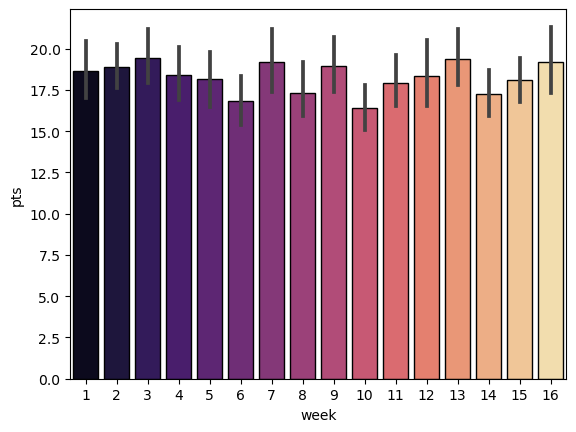

In [40]:
rec_df20 = weekly_breakdown(receiving_df, 2020)

sns.barplot(y = rec_df20.pts, x = rec_df20.week, data = rec_df20, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

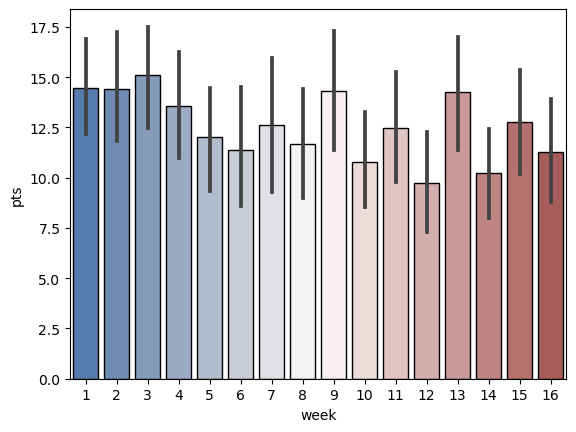

In [41]:
pa_df20 = weekly_breakdown(passing_df, 2020)

sns.barplot(y = pa_df20.pts, x = pa_df20.week, data = pa_df20, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

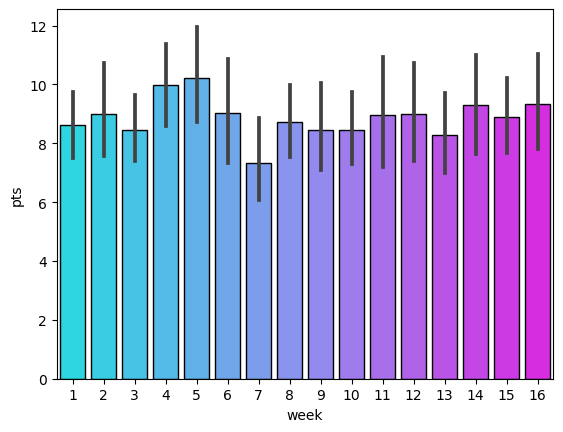

In [42]:
rush_df21 = weekly_breakdown(rushing_df,2021)

sns.barplot(y = rush_df21.pts, x = rush_df21.week, data = rush_df21, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

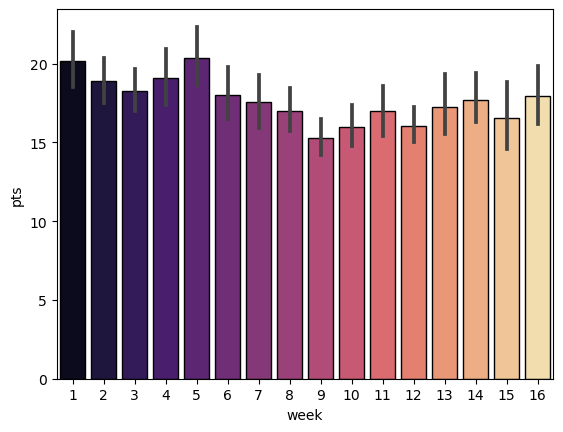

In [43]:
rec_df21 = weekly_breakdown(receiving_df, 2021)

sns.barplot(y = rec_df21.pts, x = rec_df21.week, data = rec_df21, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

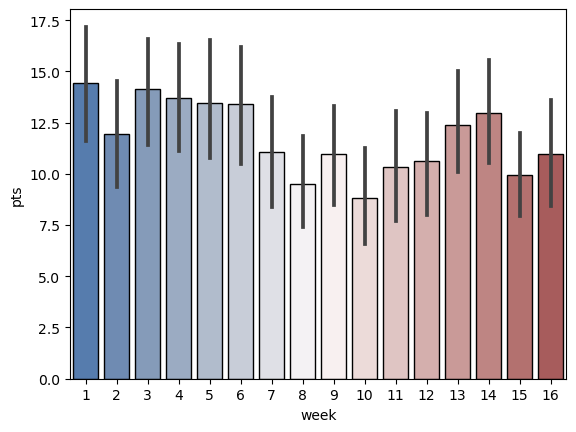

In [44]:
pa_df21 = weekly_breakdown(passing_df, 2021)

sns.barplot(y = pa_df21.pts, x = pa_df21.week, data = pa_df21, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

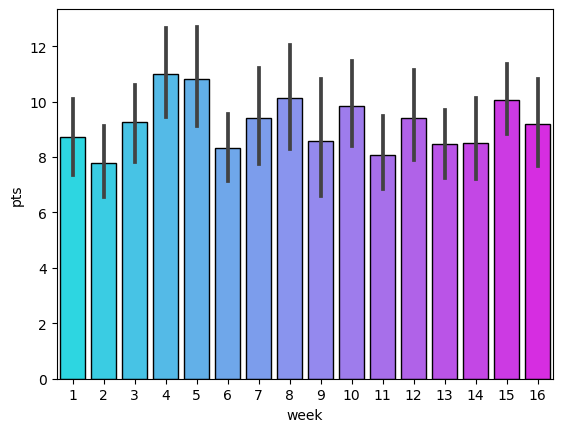

In [45]:
rush_df22 = weekly_breakdown(rushing_df,2022)

sns.barplot(y = rush_df22.pts, x = rush_df22.week, data = rush_df22, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

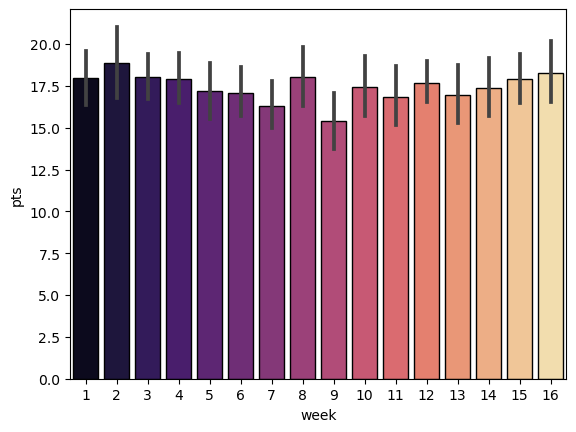

In [46]:
rec_df22 = weekly_breakdown(receiving_df, 2022)

sns.barplot(y = rec_df22.pts, x = rec_df22.week, data = rec_df22, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

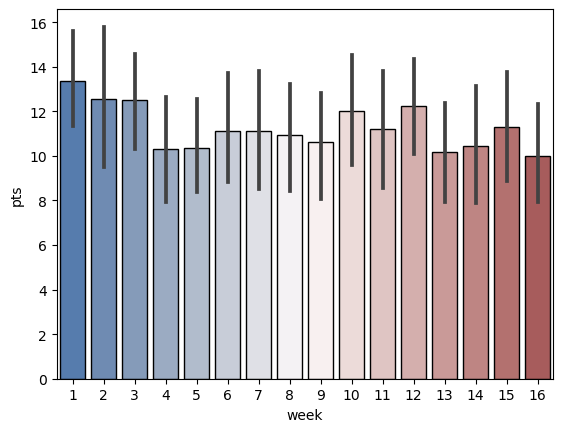

In [47]:
pa_df22 = weekly_breakdown(passing_df, 2022)

sns.barplot(y = pa_df22.pts, x = pa_df22.week, data = pa_df22, palette = 'vlag', edgecolor = 'black')

|Rushing weekly |Receiving Weekly|Passing Weekly|
|-|-|-|
|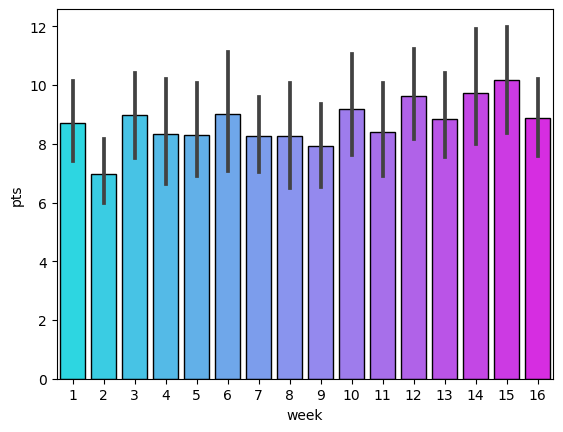| 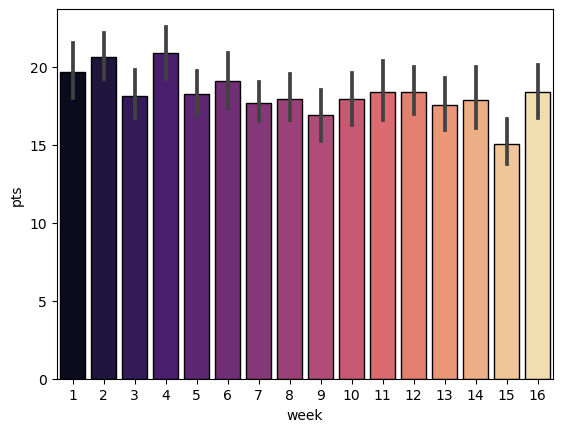|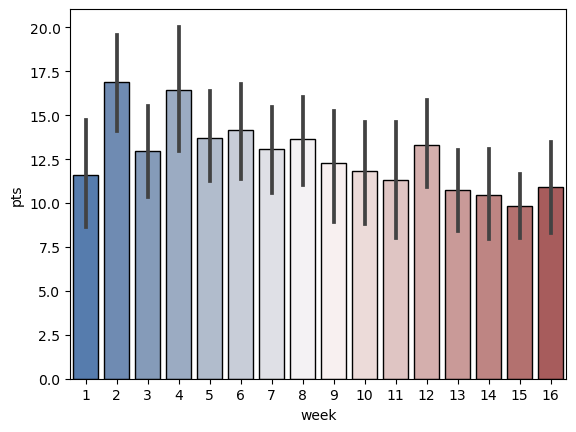|
|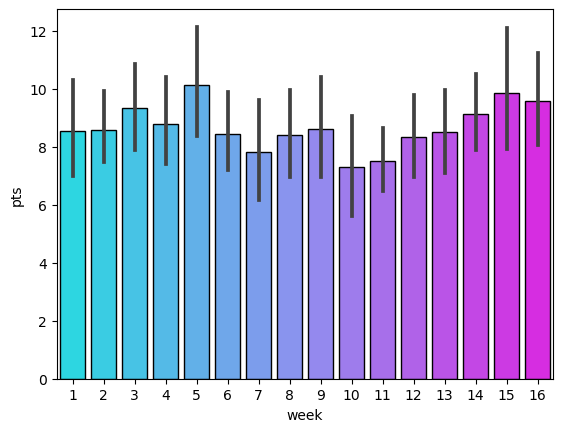|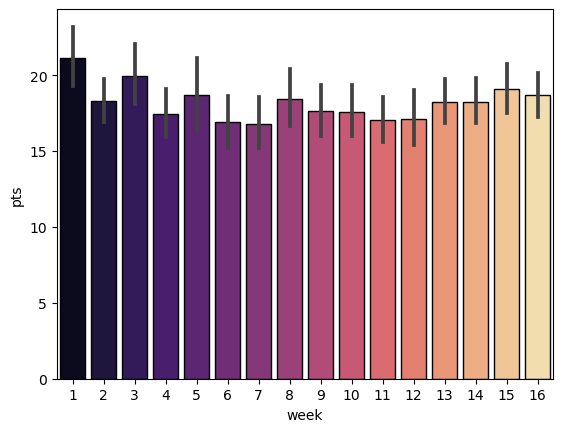|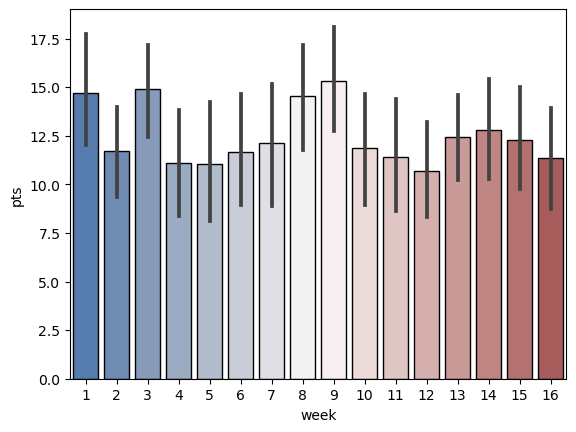
|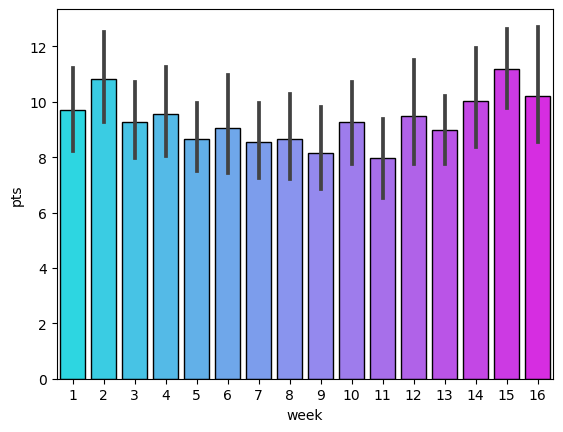|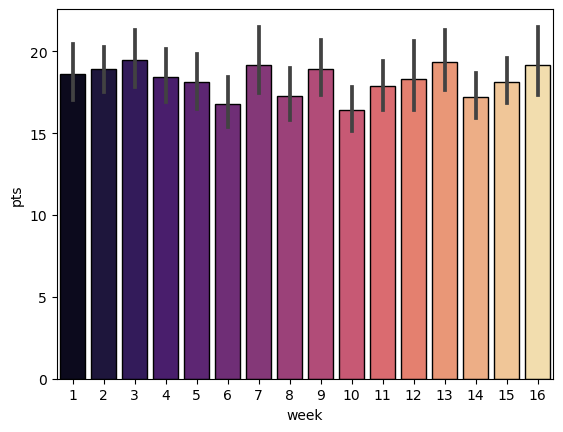|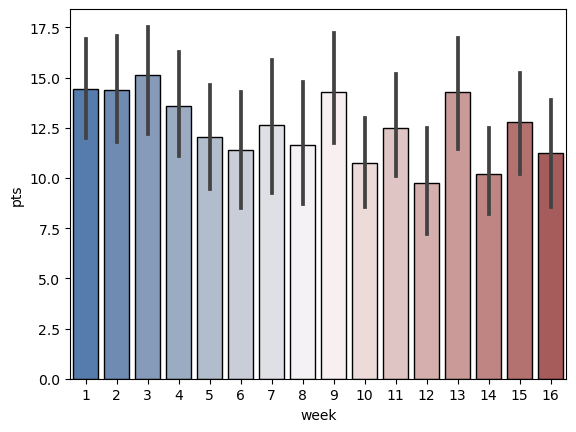
|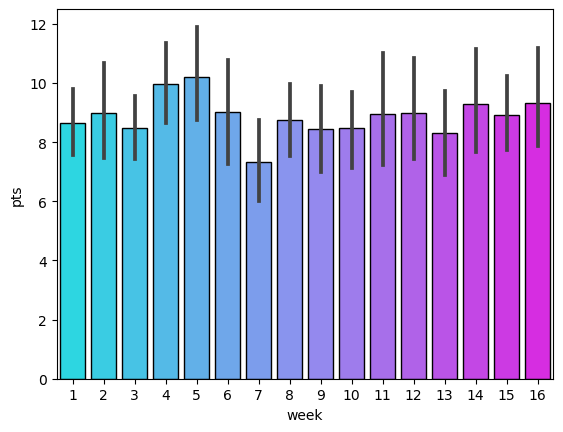|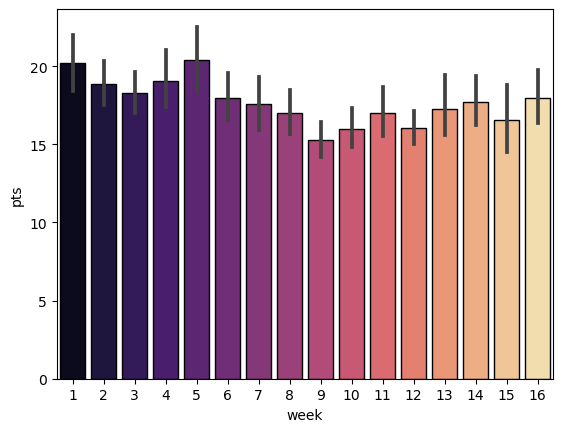|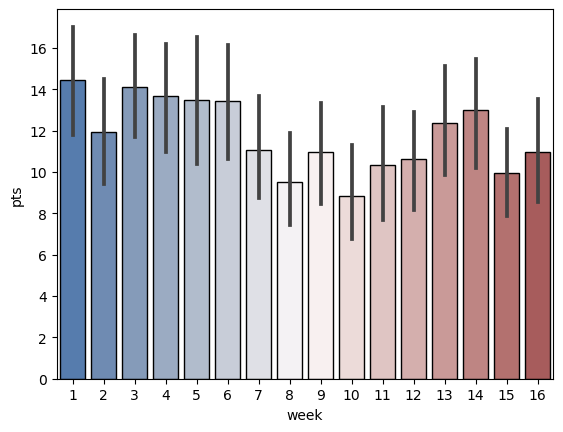
|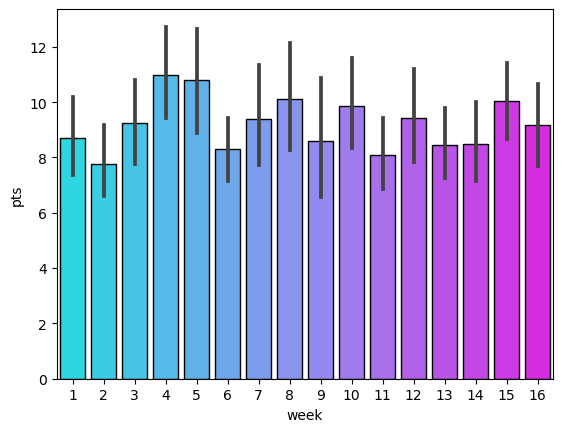|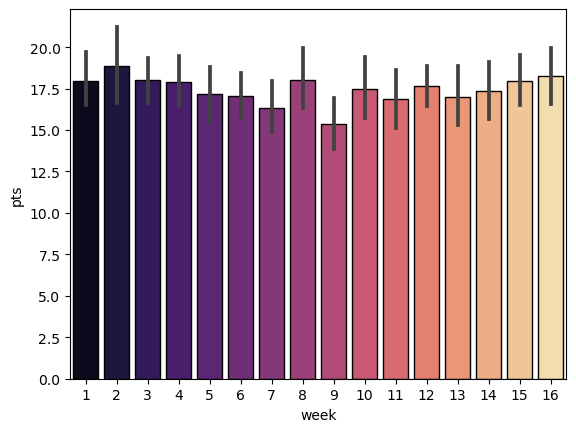|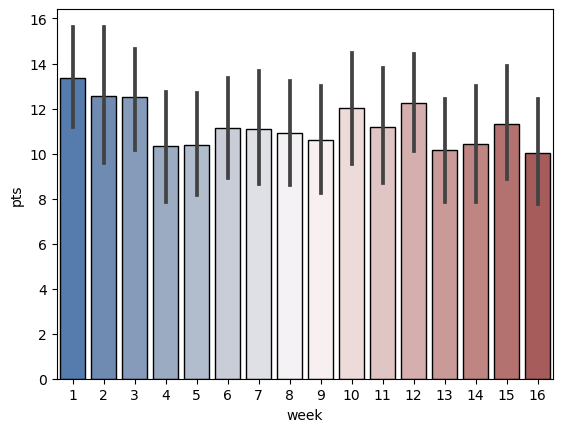


In [48]:
season_df = pd.read_csv('season.csv', index_col = 0)
season_df.pos.value_counts()

WR    1315
RB    1016
TE     736
QB     499
Name: pos, dtype: int64

In [49]:
season_df = season_df.replace(to_replace = 1824.0, value = 300)

In [50]:
season_df = season_df[season_df['ppr_pts'] > 50]

In [51]:
season_df = season_df[season_df['avg_draft_pos_ppr'] < 351]

In [52]:
s16_df = season_df[season_df['year'] == 2016]

In [53]:
s17_df = season_df[season_df['year'] == 2017]

In [54]:
s18_df = season_df[season_df['year'] == 2018]

In [55]:
s19_df = season_df[season_df['year'] == 2019]

In [56]:
s20_df = season_df[season_df['year'] == 2020]

In [57]:
s21_df = season_df[season_df['year'] == 2021]

In [58]:
s22_df = season_df[season_df['year'] == 2022]

>>>>>> # Functions by position breakdown

In [59]:
def qb_df(df):
    qb_df = df[df['pos'] == 'QB']
    return qb_df

In [60]:
def wr_df(df):
    wr_df = df[df['pos'] == 'WR']
    return wr_df

In [61]:
def rb_df(df):
    rb_df = df[df['pos'] == 'RB']
    return rb_df

In [62]:
def te_df(df):
    te_df = df[df['pos'] == 'TE']
    return te_df

>>>>>> # Visual Functions by position breakdown

In [63]:
def qb_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [64]:
def wr_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [65]:
def rb_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [66]:
def te_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [67]:
qb16 = qb_df(s16_df)

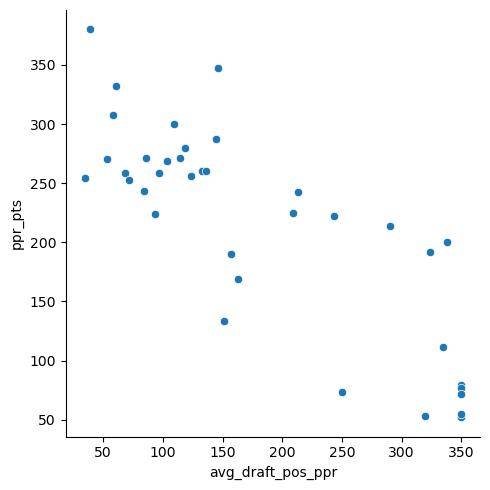

In [68]:
sns.relplot(y = qb16['ppr_pts'], x = qb16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = qb16)

In [69]:
wr16 = wr_df(s16_df)

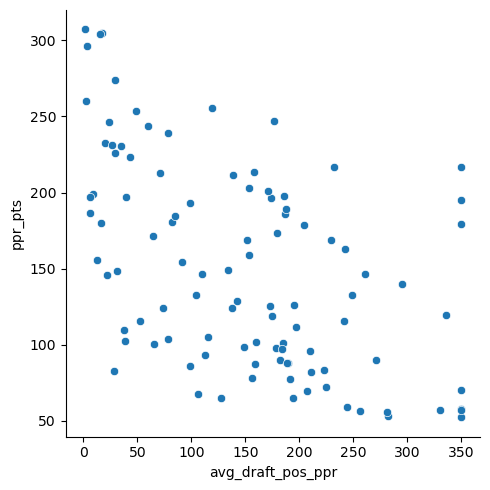

In [70]:
sns.relplot(y = wr16['ppr_pts'], x = wr16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = wr16)

In [71]:
rb16 = rb_df(s16_df)

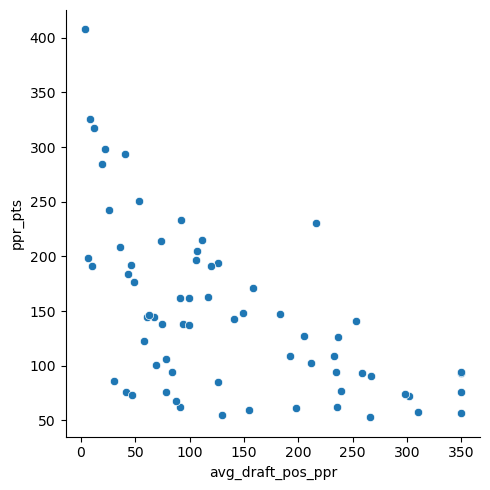

In [72]:
sns.relplot(y = rb16['ppr_pts'], x = rb16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = rb16)

In [73]:
te16 = te_df(s16_df)

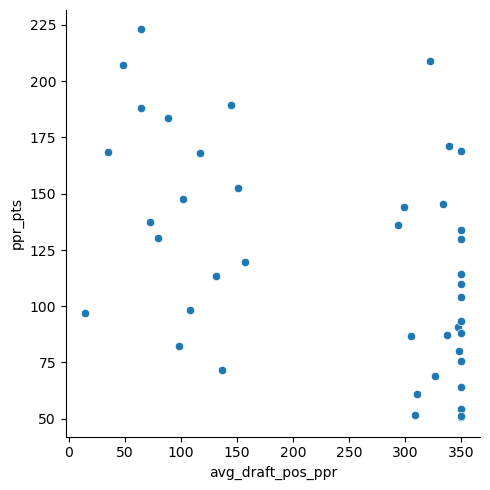

In [74]:
sns.relplot(y = te16['ppr_pts'], x = te16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = te16)

In [75]:
qb17 = qb_df(s17_df)

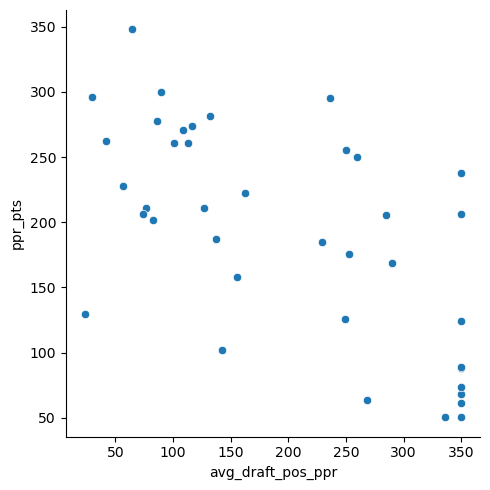

In [76]:
sns.relplot(y = qb17['ppr_pts'], x = qb17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = qb17)

In [77]:
wr17 = wr_df(s17_df)

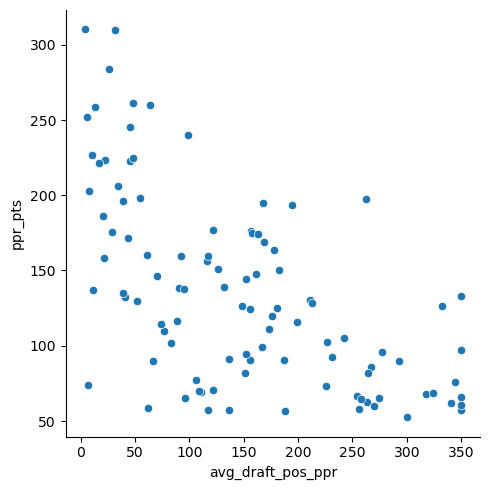

In [78]:
sns.relplot(y = wr17['ppr_pts'], x = wr17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = wr17)

In [79]:
rb17 = rb_df(s17_df)

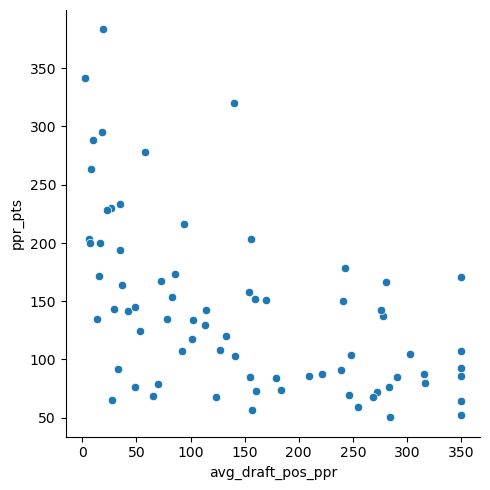

In [80]:
sns.relplot(y = rb17['ppr_pts'], x = rb17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = rb17)

In [81]:
te17 = te_df(s17_df)

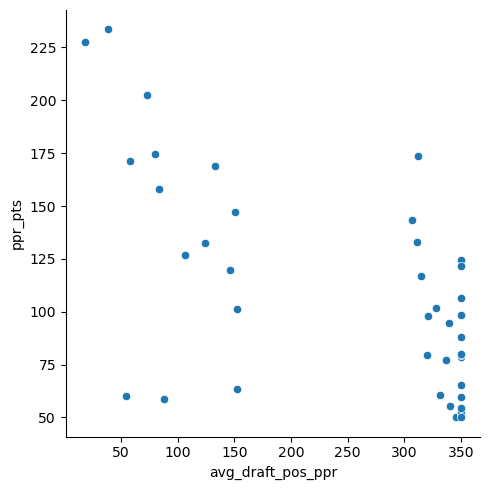

In [82]:
sns.relplot(y = te17['ppr_pts'], x = te17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = te17)

In [83]:
qb18 = qb_df(s18_df)

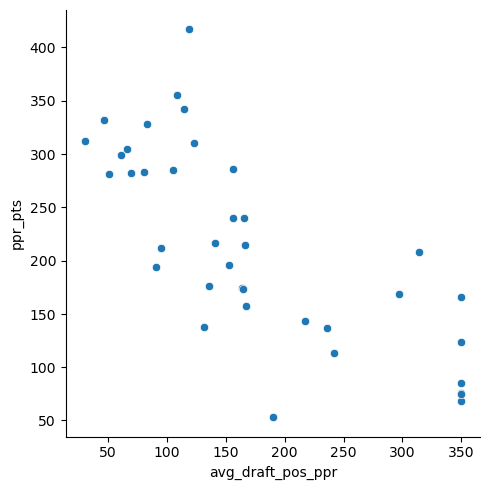

In [84]:
qb_viz(qb18)

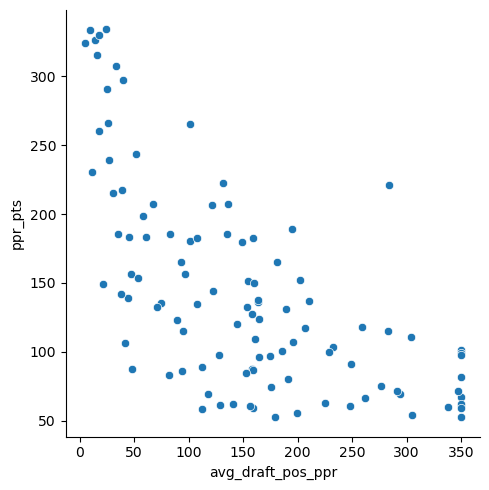

In [85]:
wr18 = wr_df(s18_df)
wr_viz(wr18)

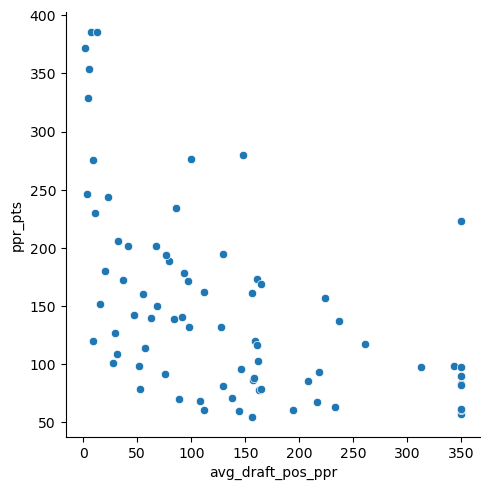

In [86]:
rb18 = rb_df(s18_df)
rb_viz(rb18)

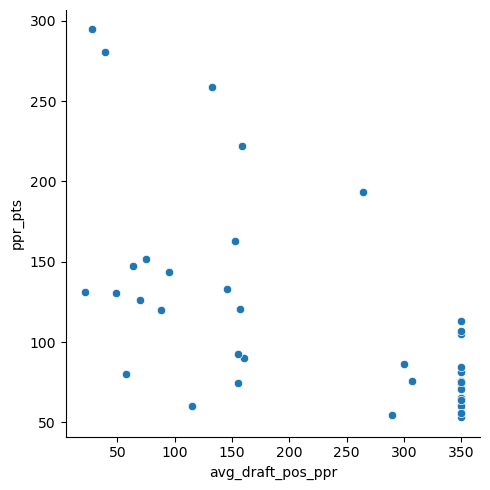

In [87]:
te18 = te_df(s18_df)
te_viz(te18)

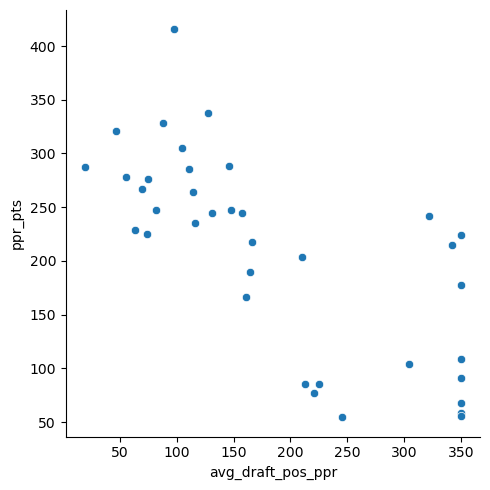

In [88]:
qb19 = qb_df(s19_df)
qb_viz(qb19)

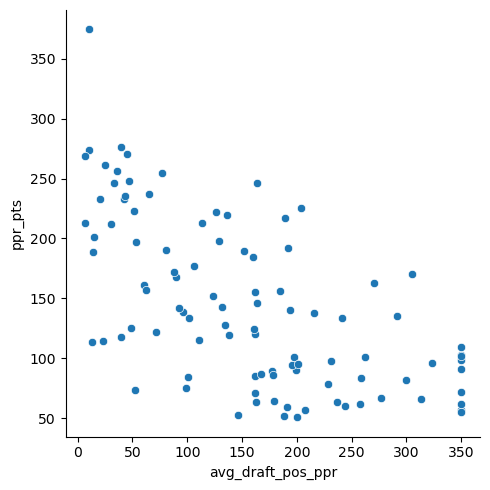

In [89]:
wr19 = wr_df(s19_df)
wr_viz(wr19)

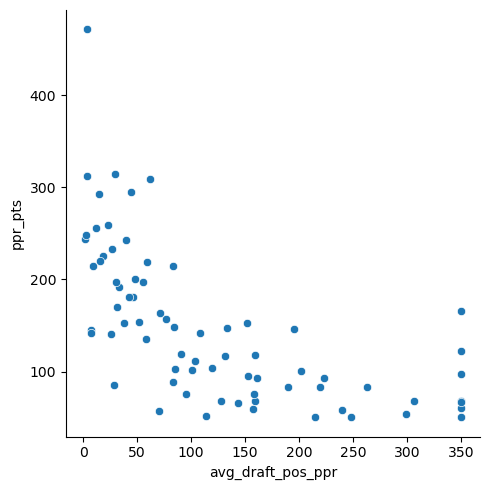

In [90]:
rb19 = rb_df(s19_df)
rb_viz(rb19)

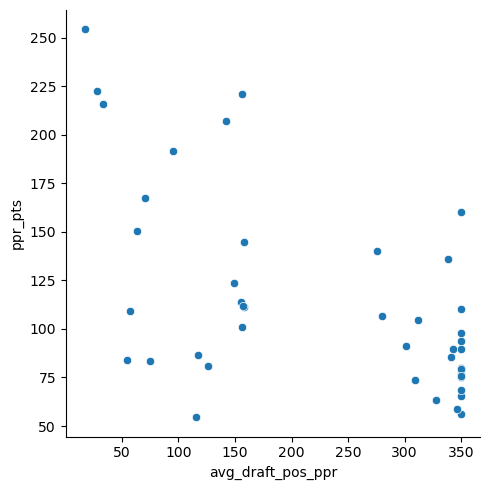

In [91]:
te19 = te_df(s19_df)
te_viz(te19)

|2016 QB |2016 WR|2016 RB|2016 TE|
|-|-|-|-|
|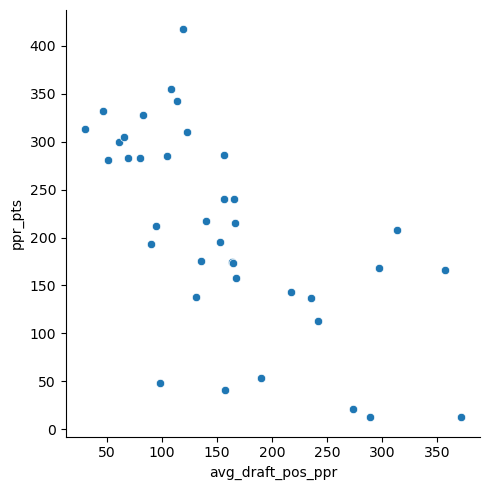|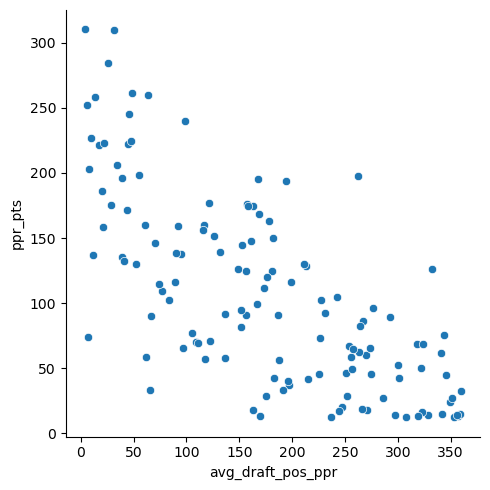|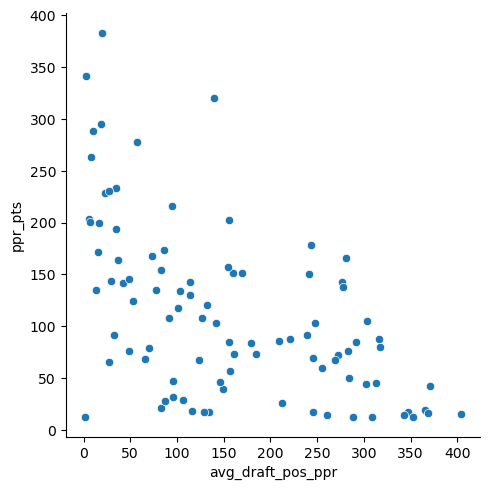|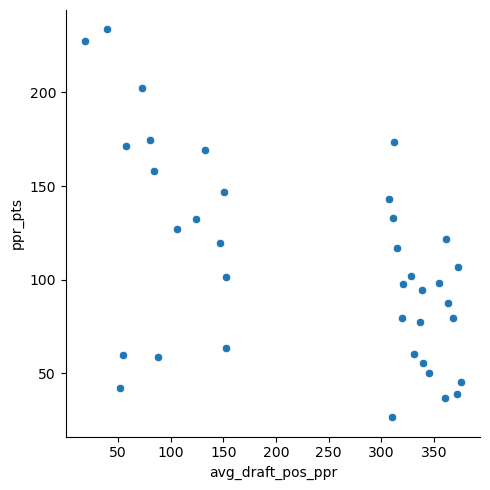|
|2017 QB |2017 WR|2017 RB|2017 TE|
|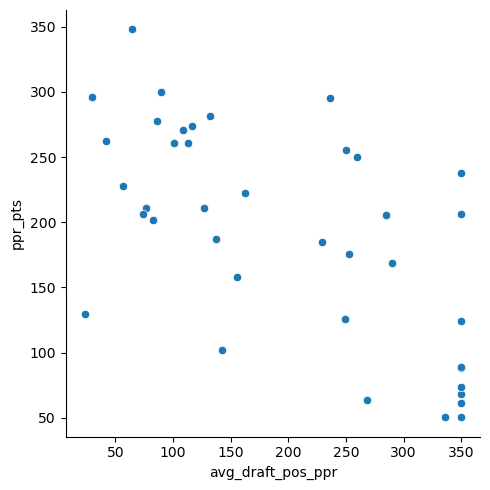|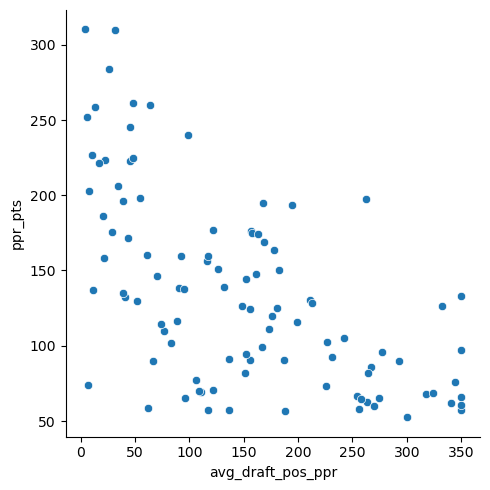|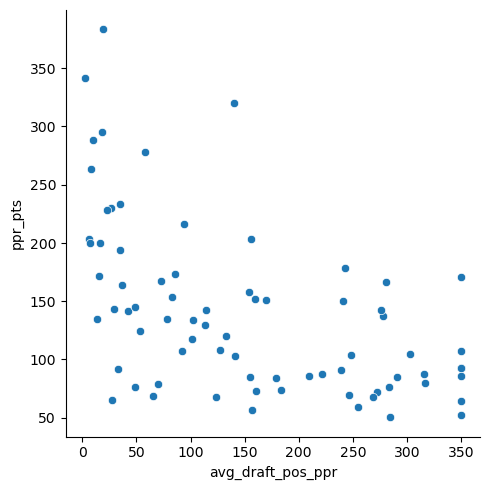|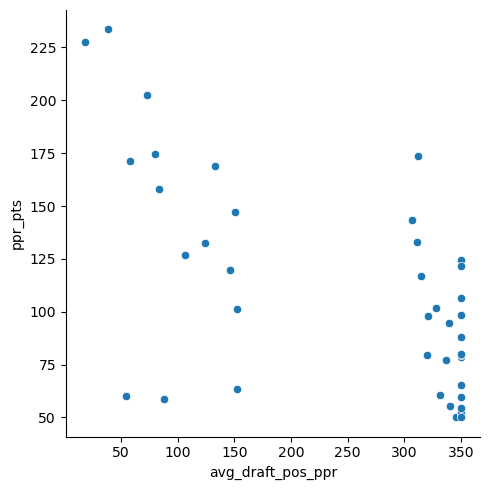|
|2018 QB |2018 WR|2018 RB|2018 TE|
|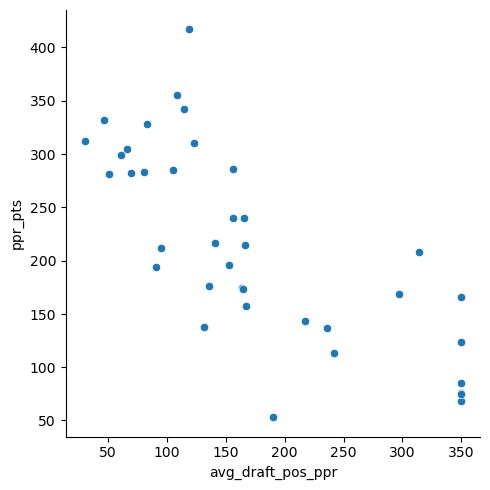|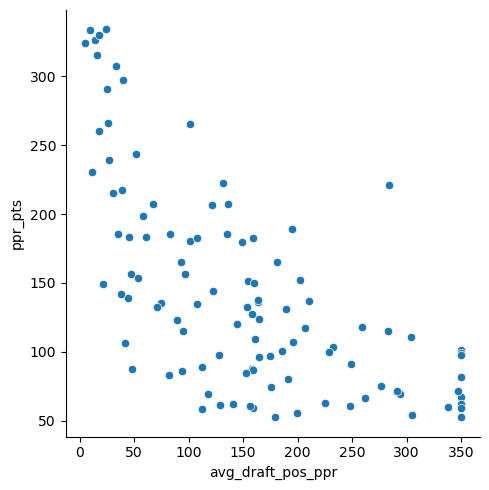|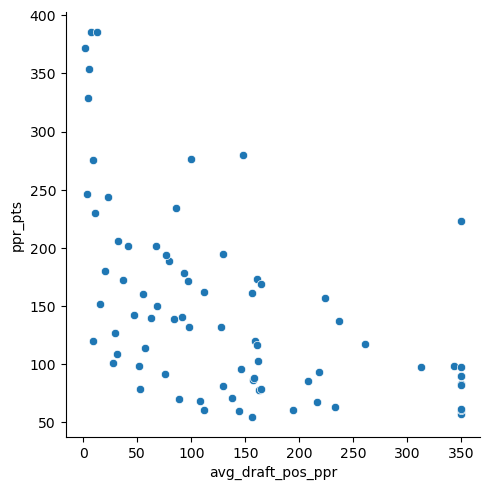|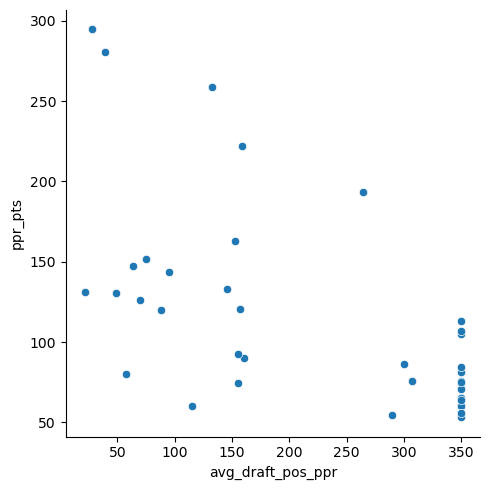|
|2019 QB |2019 WR|2019 RB|2019 TE|
|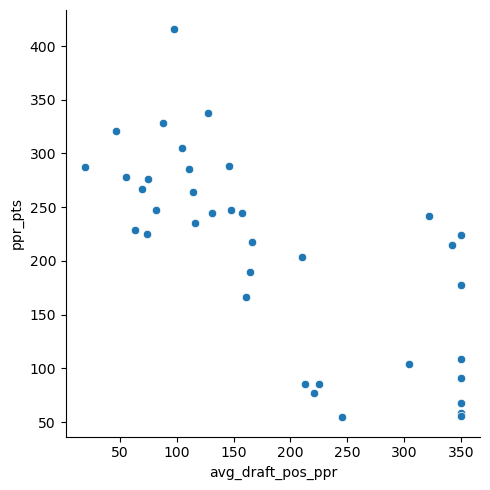|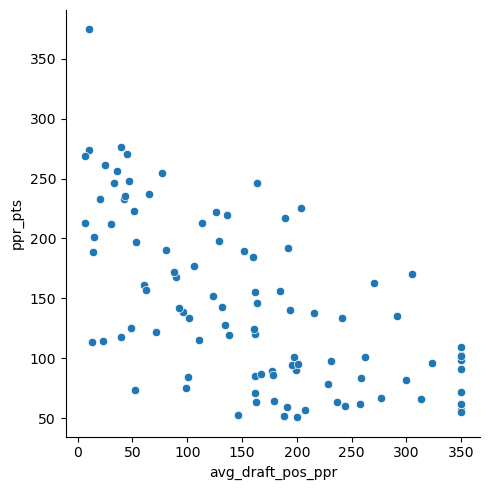|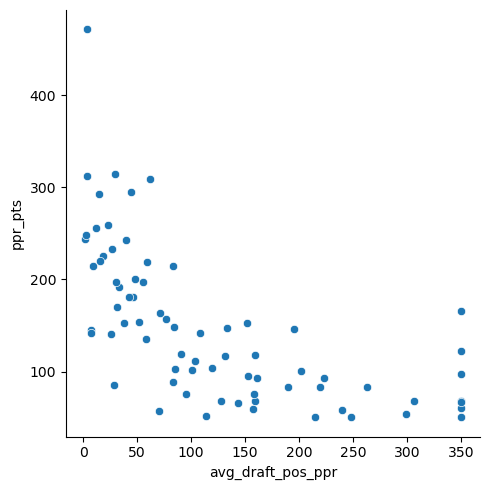|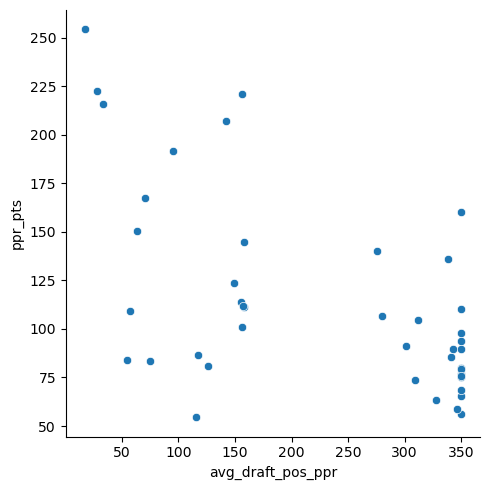|
|2020 QB |2020 WR|2020 RB|2020 TE|
|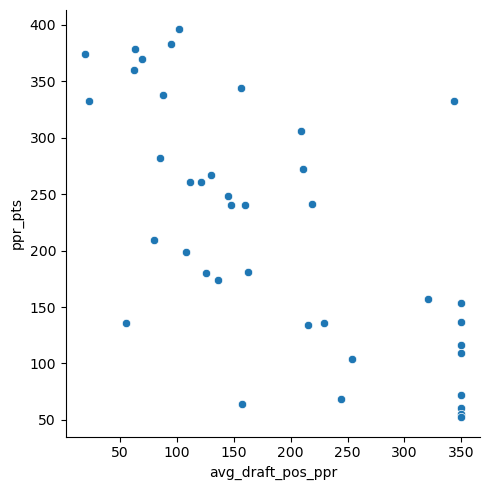|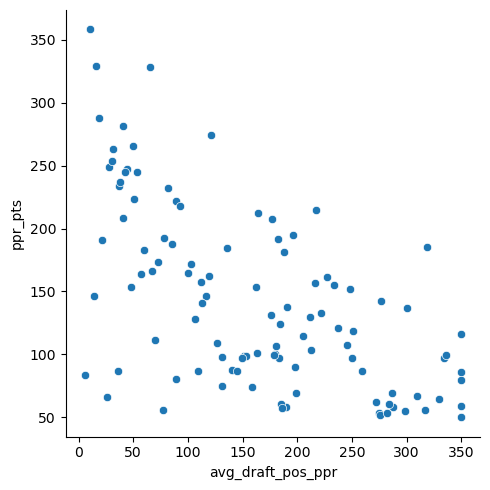|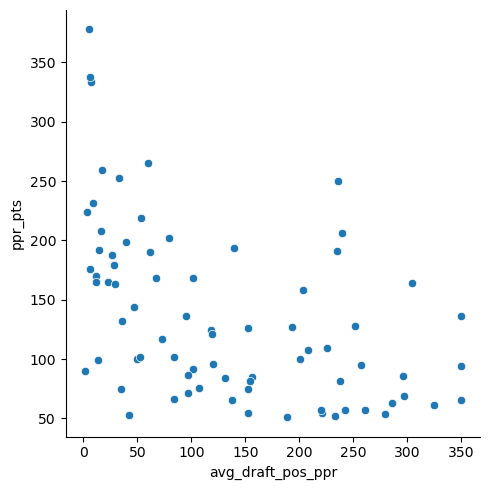|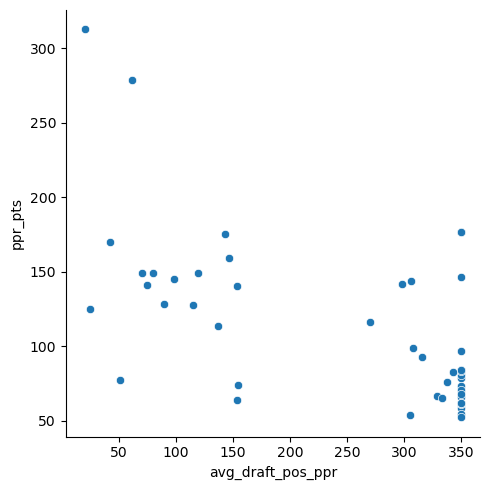|
|2021 QB |2021 WR|2021 RB|2021 TE|
|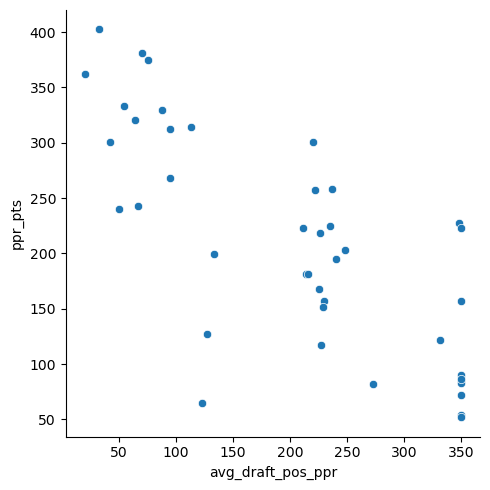|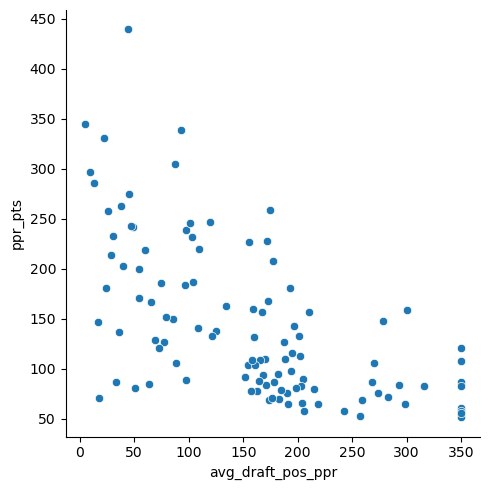|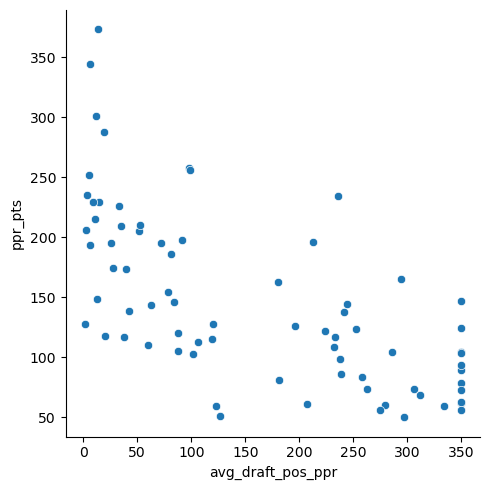|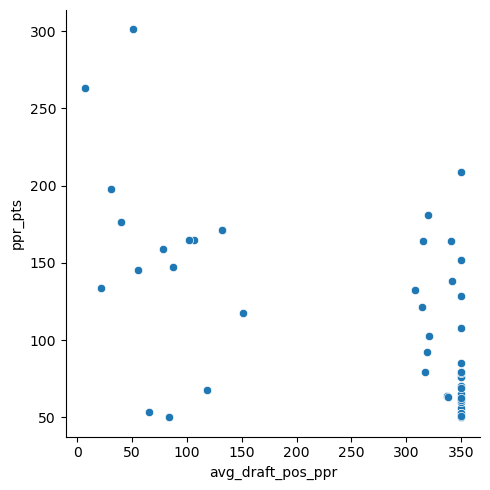|
|2022 QB |2022 WR|2022 RB|2022 TE|
|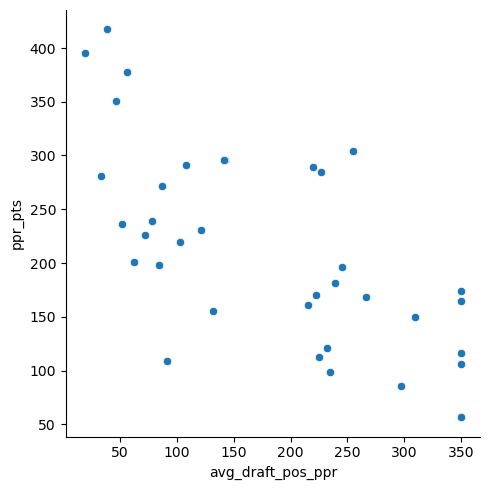|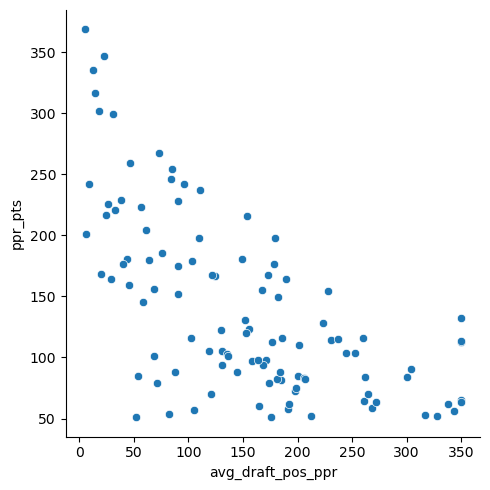|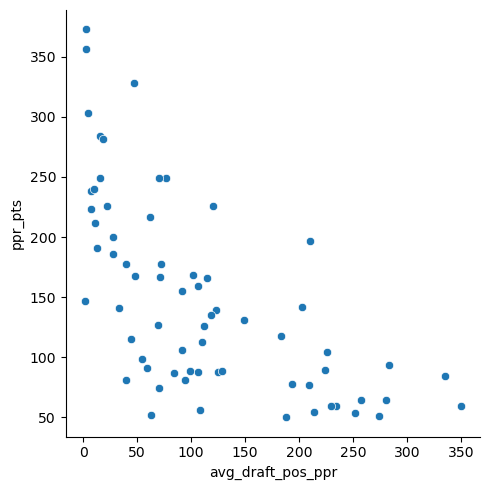|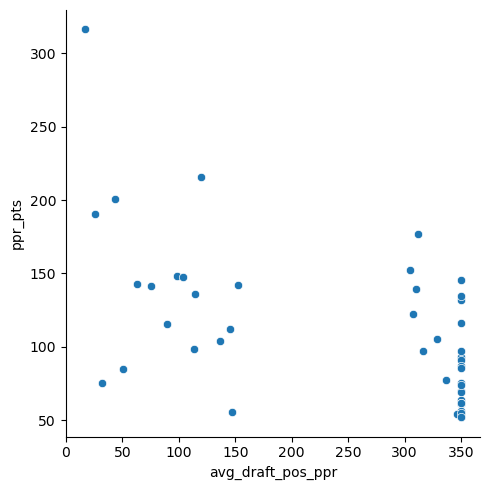|

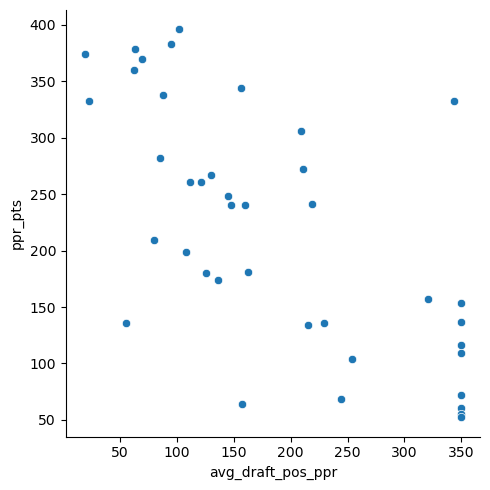

In [92]:
qb20 = qb_df(s20_df)
qb_viz(qb20)

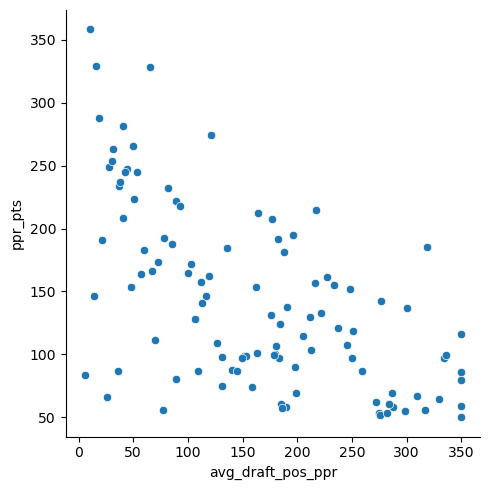

In [93]:
wr20 = wr_df(s20_df)
wr_viz(wr20)

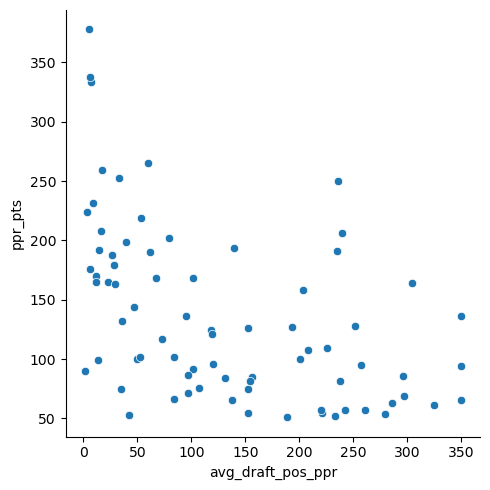

In [94]:
rb20 = rb_df(s20_df)
rb_viz(rb20)

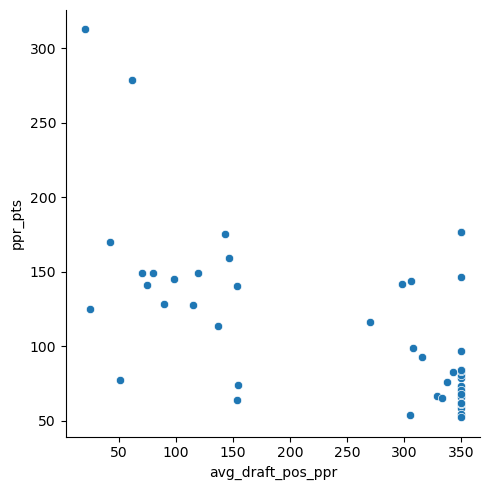

In [95]:
te20 = te_df(s20_df)
te_viz(te20)

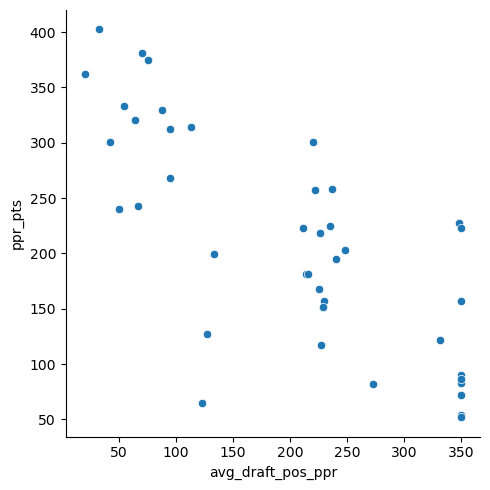

In [96]:
qb21 = qb_df(s21_df)
qb_viz(qb21)

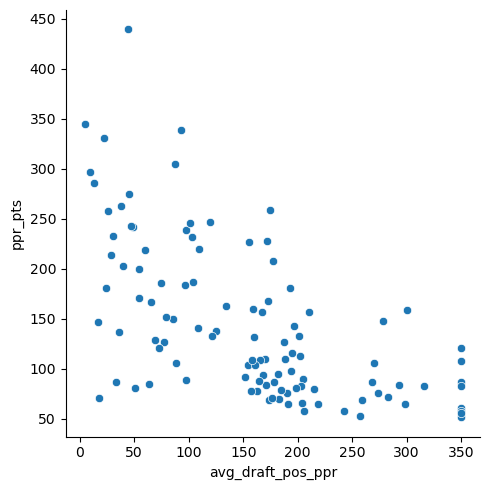

In [97]:
wr21 = wr_df(s21_df)
wr_viz(wr21)

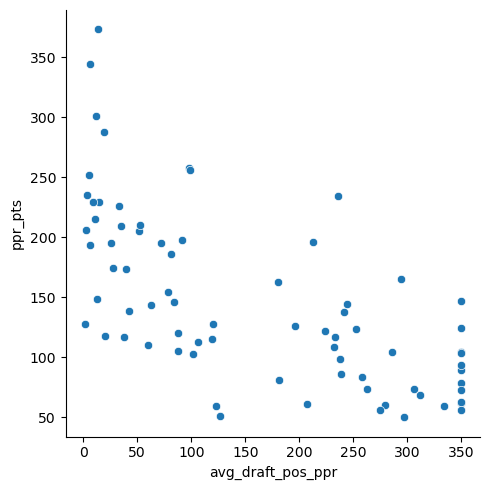

In [98]:
rb21 = rb_df(s21_df)
rb_viz(rb21)

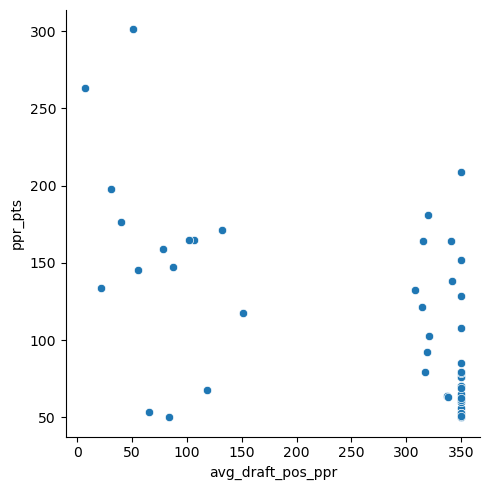

In [99]:
te21 = te_df(s21_df)
te_viz(te21)

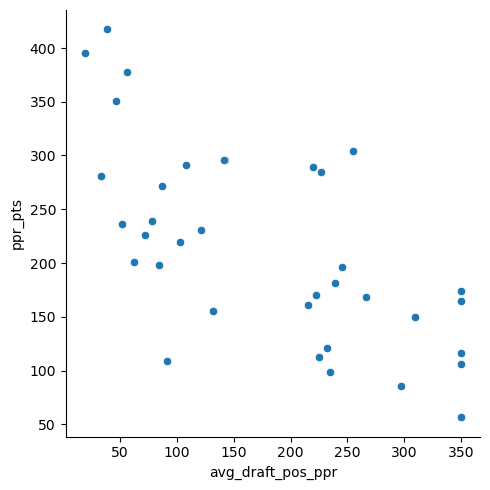

In [100]:
qb22 = qb_df(s22_df)
qb_viz(qb22)

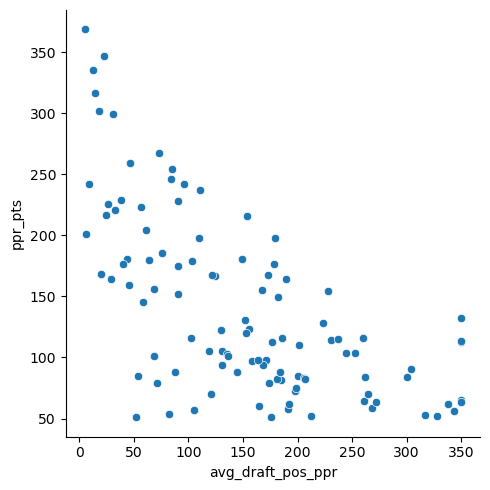

In [101]:
wr22 = wr_df(s22_df)
wr_viz(wr22)

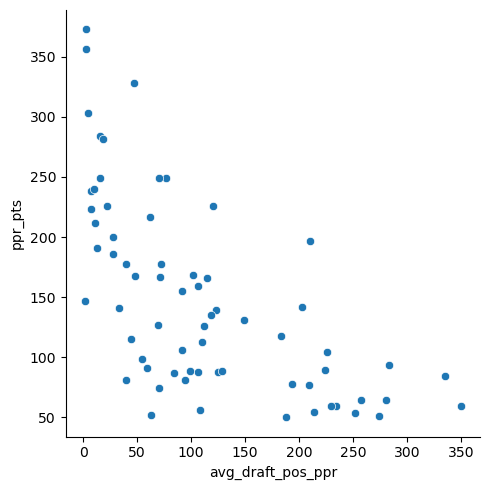

In [102]:
rb22 = rb_df(s22_df)
rb_viz(rb22)

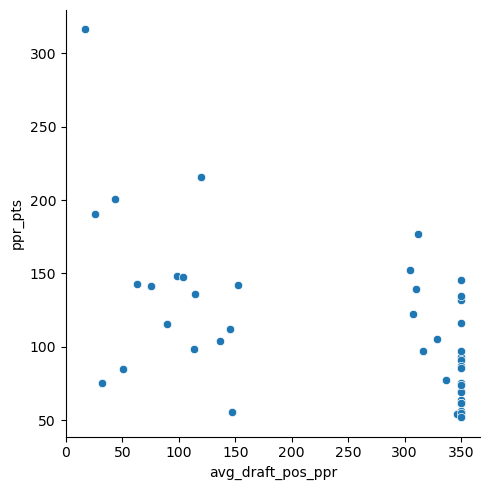

In [103]:
te22 = te_df(s22_df)
te_viz(te22)

>>>>>>>>>>> # Positional Tier Binning

In [104]:
tier_diffrb16 = rb16.sort_values('ppr_pts', ascending = False).head(36)
tier_diffrb16['tier'] = 0
tier_diff = (tier_diffrb16['ppr_pts'].max() - tier_diffrb16['ppr_pts'].min()) / 4
tier_diff

67.7

In [105]:
tier_diffrb16['tier'] = pd.cut(tier_diffrb16['ppr_pts'], [136.9, 204.7, 272.4, 340.1, 407.8], 
                               labels=['tier 4', 'tier 3', 'tier 2', 'tier 1'])

In [106]:
tier_diffrb16['tier'].value_counts()

tier 4    22
tier 3     8
tier 2     5
tier 1     1
Name: tier, dtype: int64

In [107]:
tier_diffrb16[['player', 'ppr_pts', 'tier']].head()

,player,ppr_pts,tier
253,David Johnson,407.8,tier 1
169,Ezekiel Elliott,325.4,tier 2
57,Le'Veon Bell,317.4,tier 2
119,LeSean McCoy,298.3,tier 2
482,DeMarco Murray,293.8,tier 2


>>>>>>>>>>> # ADP binning

In [108]:
draft_sect_qb16 = qb16.sort_values('ppr_pts', ascending = False)

In [109]:
draft_sect_qb16['draft_sect'] = pd.cut(draft_sect_qb16['avg_draft_pos_ppr'], 2, 
                               labels=['1st half', '2nd half'])

In [110]:
draft_sect_qb16 = draft_sect_qb16.reset_index(drop = True)

In [111]:
drop_cols = ['standard_pts', 'avg_draft_pos', 'pos_rank', 'rk']

In [112]:
draft_sect_qb16 = draft_sect_qb16.drop(columns = drop_cols)

In [113]:
draft_sect_qb16 = draft_sect_qb16.sort_values('avg_draft_pos_ppr')
draft_sect_qb16 = draft_sect_qb16.reset_index(drop = True)
draft_sect_qb16['pick_no'] = draft_sect_qb16.index + 1
draft_sect_qb16.head()

,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,ppr_pts,vbd,year,avg_draft_pos_ppr,draft_sect,pick_no
0,Cam Newton,CAR,QB,27,15,14,270.0,510.0,3509.0,19.0,14.0,90.0,359.0,3.99,5.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,5,254.3,0.0,2016,34.5,1st half,1
1,Aaron Rodgers,GNB,QB,33,16,16,401.0,610.0,4428.0,40.0,7.0,67.0,369.0,5.51,4.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,4,380.0,119.0,2016,38.7,1st half,2
2,Russell Wilson,SEA,QB,28,16,16,353.0,546.0,4219.0,21.0,11.0,72.0,259.0,3.60,1.0,2.0,2.0,14.0,7.0,1.0,8.0,2.0,2,270.1,7.0,2016,53.2,1st half,3
3,Andrew Luck,IND,QB,27,15,15,346.0,545.0,4240.0,31.0,13.0,64.0,341.0,5.33,2.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,2,307.7,47.0,2016,58.3,1st half,4
4,Drew Brees,NOR,QB,37,16,16,471.0,673.0,5208.0,37.0,15.0,23.0,20.0,0.87,2.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2,332.3,72.0,2016,61.1,1st half,5


In [114]:
#draft_sect_qb16['success'] = (draft_sect_qb16.draft_sect=='1st half') & (draft_sect_qb16.pos_rank<7)

In [115]:
df = pd.read_csv('season.csv',index_col=0)

seasons = range(2016,2023)
positions = ['QB','RB','WR','TE']
add = []

for s in seasons:
    for p in positions:
        test = df[(df.year==s)&(df.pos==p)].sort_values('avg_draft_pos_ppr').reset_index(drop=True)
        test['adp_by_pos'] = test.index+1
        
        test = test[(test.year==s)&(test.pos==p)].sort_values('ppr_pts',ascending=False).reset_index(drop=True)
        test['pos_rank'] = test.index+1
        
        add.append(test)

df = pd.concat(add).reset_index(drop=True)

for i in range(0,len(df.index)):
    if df.loc[i,'pos'] =='QB' or df.loc[i,'pos'] =='TE':
        
        if df.loc[i, 'adp_by_pos'] <= 3:
            if df.loc[i,'pos_rank'] <= 3:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        else:
            if df.loc[i,'pos_rank']<=12:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

    else:
        if df.loc[i, 'adp_by_pos'] <= 6:
            if df.loc[i,'pos_rank'] <= 6:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        elif df.loc[i, 'adp_by_pos'] > 36:
            if df.loc[i,'pos_rank'] < 36:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        else:
            if df.loc[i,'pos_rank'] <= df.loc[i,'adp_by_pos']:
                df.loc[i, 'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        
        
for i in range(0,len(df.index)):
    if df.loc[i,'avg_draft_pos_ppr'] <= 12:
        df.loc[i, 'round'] = 1
    elif df.loc[i,'avg_draft_pos_ppr'] <= 24:
        df.loc[i, 'round'] = 2
    elif df.loc[i,'avg_draft_pos_ppr'] <= 36:
        df.loc[i, 'round'] = 3
    elif df.loc[i,'avg_draft_pos_ppr'] <= 48:
        df.loc[i, 'round'] = 4
    elif df.loc[i,'avg_draft_pos_ppr'] <= 60:
        df.loc[i, 'round'] = 5
    elif df.loc[i,'avg_draft_pos_ppr'] <= 72:
        df.loc[i, 'round'] = 6
    elif df.loc[i,'avg_draft_pos_ppr'] <= 84:
        df.loc[i, 'round'] = 7
    elif df.loc[i,'avg_draft_pos_ppr'] <= 96:
        df.loc[i, 'round'] = 8
    elif df.loc[i,'avg_draft_pos_ppr'] <= 108:
        df.loc[i, 'round'] = 9
    elif df.loc[i,'avg_draft_pos_ppr'] <= 120:
        df.loc[i, 'round'] = 10
    elif df.loc[i,'avg_draft_pos_ppr'] <= 132:
        df.loc[i, 'round'] = 11
    elif df.loc[i,'avg_draft_pos_ppr'] <= 144:
        df.loc[i, 'round'] = 12
    elif df.loc[i,'avg_draft_pos_ppr'] <= 156:
        df.loc[i, 'round'] = 13
    elif df.loc[i,'avg_draft_pos_ppr'] <= 168:
        df.loc[i, 'round'] = 14
    else:
        df.loc[i, 'round'] = 15

In [116]:
new16_df = df[df['year'] == 2016]

In [117]:
new17_df = df[df['year'] == 2017]

In [118]:
new18_df = df[df['year'] == 2018]

In [119]:
new19_df = df[df['year'] == 2019]

In [120]:
new20_df = df[df['year'] == 2020]

In [121]:
new21_df = df[df['year'] == 2021]

In [122]:
new22_df = df[df['year'] == 2022]

In [123]:
def positional_df(df, pos):
    df = df[df['pos'] == pos]
    return df

In [124]:
def results(df):
    success_rate = []

    for i in range(1, 16):
        rate = df[df['round']==i]
        rate = rate.success.sum() / 12
        success_rate.append(rate)
    return success_rate

In [125]:
a = positional_df(new16_df, 'RB')

In [126]:
a = results(a)

In [127]:
rounds = range(1,16)
seasons = range(2016,2023)
pos = ['QB','RB','WR','TE']
qb = []
rb = []
wr = []
te = []
ro = []
pos_name = [qb,rb,wr,te]

for s in seasons:
    df1 = df[df.year==s]
    for r in rounds:
        ro.append(r)
        for p,n in zip(pos,pos_name):
            if df1[(df1['round']==r) & (df1.pos==p)].success.count() == 0:
                n.append(0)
                
            else:
                n.append(df1[(df1['round']==r) & (df1.pos==p)].success.sum()/df1[(df1['round']==r) & (df1.pos==p)].success.count())
               

year = []
for s in seasons:
    for r in rounds:
        year.append(s)
        
df_success = pd.DataFrame({'season':year,'qb':qb,'rb':rb,'wr':wr,'te':te,'rounds':ro})

In [128]:
df_success

,season,qb,rb,wr,te,rounds
0,2016,0.000000,0.400000,0.500000,0.000000,1
1,2016,0.000000,0.600000,0.375000,0.000000,2
2,2016,0.000000,0.666667,0.666667,0.000000,3
3,2016,1.000000,0.200000,0.200000,0.000000,4
4,2016,0.500000,0.250000,0.333333,1.000000,5
...,...,...,...,...,...,...
100,2022,0.000000,0.400000,0.166667,0.000000,11
101,2022,1.000000,0.000000,0.000000,0.000000,12
102,2022,0.000000,1.000000,0.333333,0.250000,13
103,2022,0.000000,0.000000,0.000000,0.000000,14


In [129]:
df_by_round = pd.DataFrame(df_success.groupby('rounds').mean()[['qb','rb','wr','te']])

In [130]:
df_by_season = pd.DataFrame(df_success.groupby('season').mean()[['qb','rb','wr','te']])

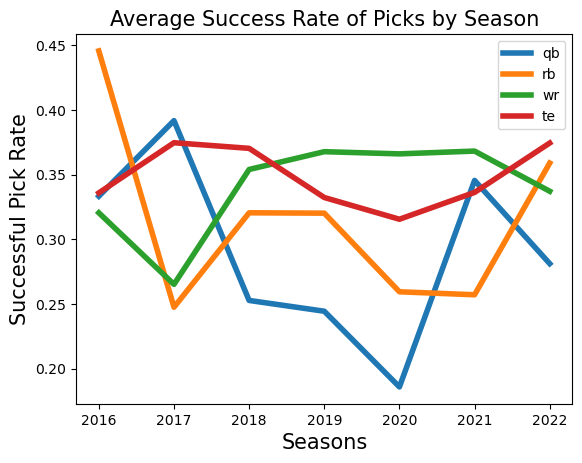

In [131]:
plt.plot(df_by_season, linewidth = 4)
plt.legend(['qb', 'rb', 'wr', 'te'])
plt.title('Average Success Rate of Picks by Season', fontdict = { 'fontsize': 15})
plt.ylabel('Successful Pick Rate', fontdict = { 'fontsize': 15})
plt.xlabel('Seasons', fontdict = { 'fontsize': 15})
plt.show()

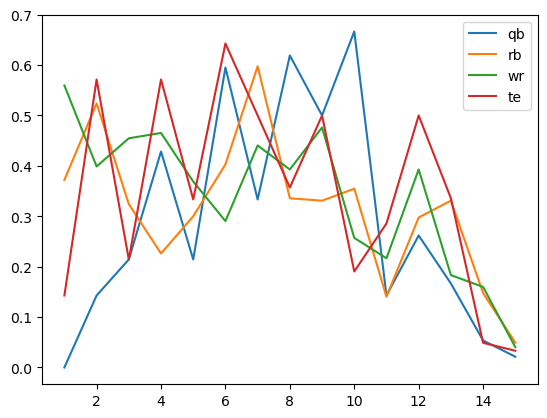

In [132]:
plt.plot(df_by_round)
plt.legend(['qb', 'rb', 'wr', 'te'])
plt.show()

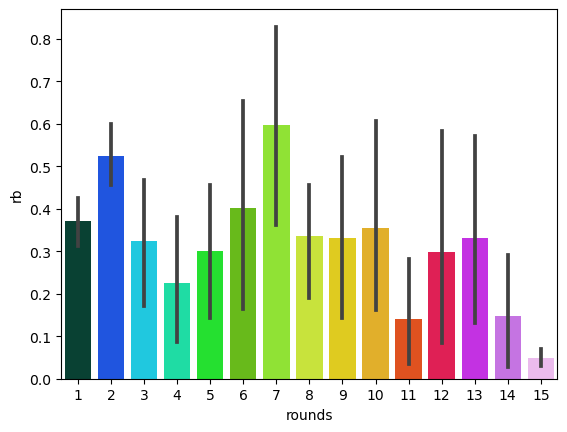

In [133]:
sns.barplot(y = 'rb', x = 'rounds', palette = 'gist_ncar', data = df_success)
plt.show() 

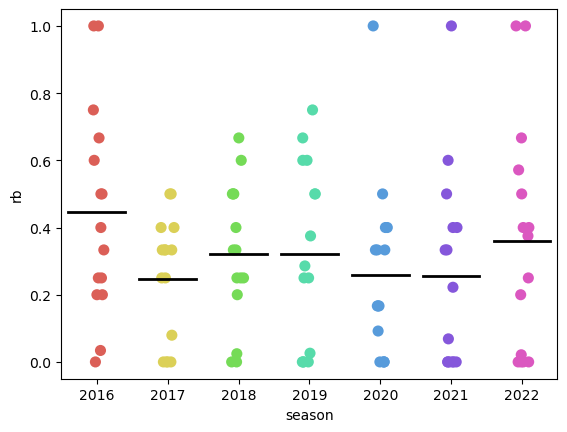

In [134]:
# Creating a visual displaying amount distro comapred to mean
p = sns.stripplot(y = 'rb', x = 'season', data = df_success, size = 8, palette = 'hls')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="season",
            y="rb",
            data=df_success,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.show()

In [135]:
rb22.sort_values('ppr_pts', ascending = False)

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr
3635,Austin Ekeler,6,LAC,RB,27,17,17,0.0,0.0,0.0,0.0,0.0,204.0,915.0,4.49,13.0,127.0,107.0,722.0,6.75,5.0,5.0,3.0,18,266.0,372.7,118.0,4,2022,7.2,2.7
3926,Christian McCaffrey,3,2TM,RB,26,17,16,1.0,1.0,34.0,1.0,0.0,244.0,1139.0,4.67,8.0,108.0,85.0,741.0,8.72,5.0,1.0,0.0,13,271.0,356.4,123.0,2,2022,2.6,2.4
3684,Josh Jacobs,2,LVR,RB,24,17,17,0.0,0.0,0.0,0.0,0.0,340.0,1653.0,4.86,12.0,64.0,53.0,400.0,7.55,0.0,3.0,1.0,12,275.0,328.3,127.0,1,2022,42.7,47.3
3404,Derrick Henry,4,TEN,RB,28,16,16,2.0,2.0,4.0,1.0,0.0,349.0,1538.0,4.41,13.0,41.0,33.0,398.0,12.06,0.0,6.0,3.0,13,270.0,302.8,122.0,3,2022,2.3,4.2
3544,Saquon Barkley,15,NYG,RB,25,16,16,0.0,0.0,0.0,0.0,0.0,295.0,1312.0,4.45,10.0,76.0,57.0,338.0,5.93,0.0,1.0,0.0,10,227.0,284.0,82.0,6,2022,18.8,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,Ameer Abdullah,296,LVR,RB,29,17,0,0.0,0.0,0.0,0.0,0.0,4.0,20.0,5.00,0.0,32.0,25.0,211.0,8.44,1.0,0.0,0.0,1,29.0,54.1,0.0,81,2022,233.0,214.0
3754,Kyle Juszczyk,274,SFO,RB,31,16,12,0.0,0.0,0.0,0.0,0.0,7.0,26.0,3.71,1.0,23.0,19.0,200.0,10.53,1.0,0.0,0.0,2,35.0,53.6,0.0,73,2022,267.0,252.0
3870,Rashaad Penny,231,SEA,RB,26,5,5,0.0,0.0,0.0,0.0,0.0,57.0,346.0,6.07,2.0,5.0,4.0,16.0,4.00,0.0,1.0,0.0,2,48.0,52.2,0.0,65,2022,59.2,63.0
3547,Justin Jackson,263,DET,RB,26,16,0,0.0,0.0,0.0,0.0,0.0,42.0,170.0,4.05,1.0,19.0,12.0,101.0,8.42,1.0,0.0,0.0,2,39.0,51.1,0.0,72,2022,257.0,274.0


In [142]:
qb = df[df.pos=='QB'].groupby('pos_rank')['ppr_pts'].mean()[0:20]
rb = df[df.pos=='RB'].groupby('pos_rank')['ppr_pts'].mean()[0:20]
wr = df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20]
te = df[df.pos=='TE'].groupby('pos_rank')['ppr_pts'].mean()[0:20]

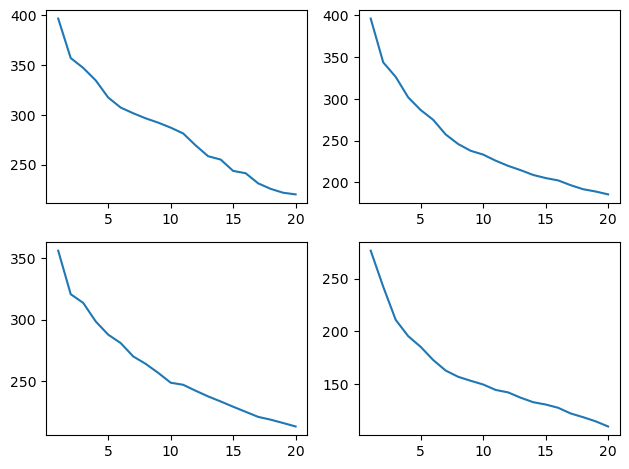

In [144]:
fig, ax = plt.subplots(2, 2)
 
# set data with subplots and plot
ax[0, 0].plot(qb)
ax[0, 1].plot(rb)
ax[1, 0].plot(wr)
ax[1, 1].plot(te)
fig.tight_layout()
plt.show() 

In [ ]:
df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()